In [4]:
import numpy as np
import matplotlib.pyplot as mp
import scipy.constants as sp
import astropy.constants as ap
import time

%matplotlib inline
mp.rc("text",usetex=True)

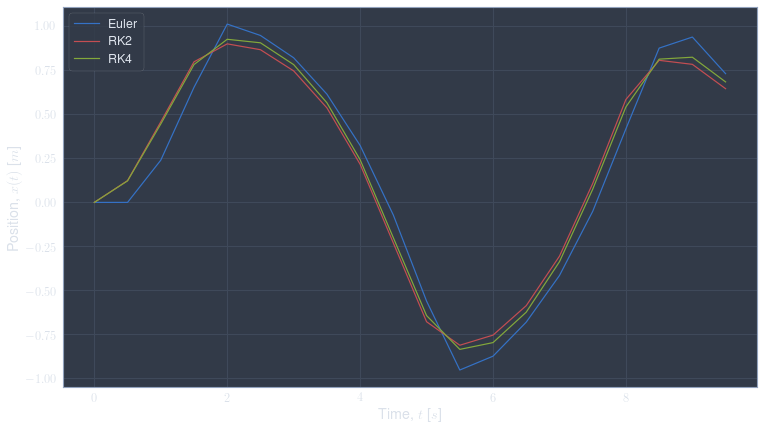

In [5]:
mp.figure(figsize=(7*16/9,7))

def f(x,t):
    return -x**3 + np.sin(t)

#Euler method
    
a = 0.0
b = 10.0
N = 20
h = (b-a)/N
x = 0.0

tpoints = np.arange(a,b,h)
xpoints = []
for t in tpoints:
    xpoints.append(x)
    x += h*f(x,t)

mp.plot(tpoints,xpoints, "b", label="Euler")

#RK2

a = 0.0
b = 10.0
N = 20
h = (b-a)/N
x = 0.0

tpoints = np.arange(a,b,h)
xpoints = []
for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    x += k2

mp.plot(tpoints,xpoints, "r", label="RK2")

#RK4

a = 0.0
b = 10.0
N = 20
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
x = 0.0

for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x += (k1+2*k2+2*k3+k4)/6

mp.plot(tpoints,xpoints, "g", label="RK4")

mp.xlabel("Time, $t$ [$s$]")
mp.ylabel("Position, $x(t)$ [$m$]")
mp.legend()
mp.show()

<b>Exercise 8.1: A low-pass filter</b>

Using Ohm’s law and the capacitor law and assuming that the output load has very high impedance, so that a negligible amount of current flows through it, we can write down the equations governing this circuit as follows. Let $I$ be the current that flows through $R$ and into the capacitor, and let $Q$ be the charge on the capacitor. Then:

\begin{equation}
    IR = V_{in} - V_{out}
\end{equation}
\begin{equation}
    Q = CV_{out}
\end{equation}
\begin{equation}
    I = \frac{dQ}{dt}
\end{equation}

Substituting the second equation into the third, then substituting the result into the first equation, we find that $V_{in} − V_{out} = RC(\frac{dV_{out}}{dt})$, or equivalently

\begin{equation}
    \frac{dV_{out}}{dt} = \frac{1}{RC}(V_{in}-V_{out})
\end{equation}

a) Write a program (or modify a previous one) to solve this equation for $V_{out}(t)$ using the fourth-order Runge–Kutta method when in the input signal is a square-wave with frequency 1 and amplitude 1. Use the program to make plots of the output of the filter circuit from $t = 0$ to $t = 10$ when $RC =$ 0.01, 0.1, and 1, with initial condition $V_{out}(0) = 0$. You will have to make a decision about what value of $h$ to use in your calculation. Small values give more accurate results, but the program will take longer to run. Try a variety of different values and choose one for your final calculations that seems sensible to you.

b) Based on the graphs produced by your program, describe what you see and explain what the circuit is doing.

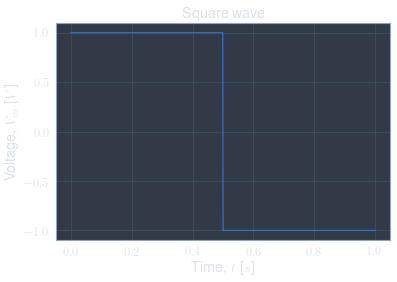

In [6]:
N = 1000
Vin = np.ones(N)*-1
x1 = np.linspace(0,1,N)
Vin[:N//2] = 1

mp.plot(x1,Vin)
mp.title("Square wave")
mp.ylabel("Voltage, $V_{in}$ [$V$]")
mp.xlabel("Time, $t$ [$s$]")
mp.show()

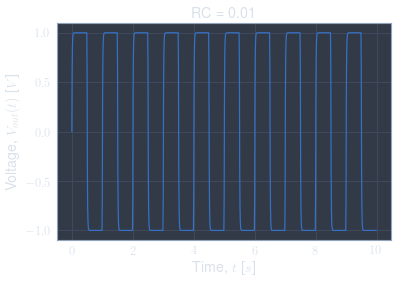

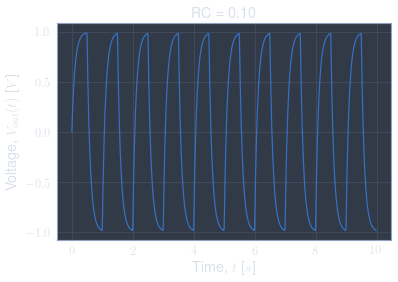

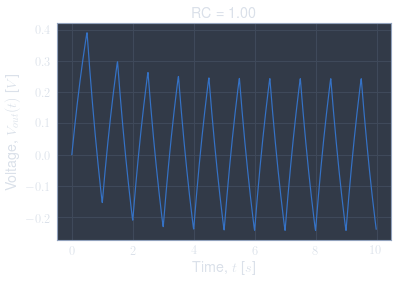

In [7]:
RC = [ 0.01 , 0.1 , 1]
    
for tau in RC:
    def Vin(t):
        if int(2*t)%2==0:
            return 1
        else:
            return -1

    def f(x,t):
        return (Vin(t)-x)/tau

    ta = 0.0
    tb = 10.0
    N = 1000
    h = (b-a)/N

    tpoints = np.arange(ta,tb,h)
    xpoints = []
    x = 0.0

    for t in tpoints:
        xpoints.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        k3 = h*f(x+0.5*k2,t+0.5*h)
        k4 = h*f(x+k3,t+h)
        x += (k1+2*k2+2*k3+k4)/6

    mp.plot(tpoints,xpoints)
    mp.title("RC = %.2f" %(tau))
    mp.xlabel("Time, $t$ [$s$]")
    mp.ylabel("Voltage, $V_{out}(t)$ [$V$]")
    mp.show()

<b>Exercise 8.2: The Lotka–Volterra equations</b>

The Lotka–Volterra equations are a mathematical model of predator–prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called “rabbits” (the prey) and “foxes” (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. Strictly the only allowed values of $x$ and $y$ would then be multiples of 0.001, since you can only have whole numbers of rabbits or foxes. But 0.001 is a pretty close spacing of values, so it’s a decent approximation to treat $x$ and $y$ as continuous real numbers so long as neither gets very close to zero.

In the Lotka–Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

\begin{equation}
    \frac{dx}{dt} = \alpha x - \beta xy
\end{equation}

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional the rate at which they eat rabbits—because they need food to grow and reproduce—but also die of old age at a rate proportional to their own population:

\begin{equation}
    \frac{dy}{dt} = \gamma xy - \delta y
\end{equation}

where $\gamma$ and $\delta$ are also constants.

a) Write a program to solve these equations using the fourth-order Runge–Kutta method for the case $\alpha = 1$, $\beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. Have the program make a graph showing both $x$ and $y$ as a function of time on the same axes from $t = 0$ to $t = 30$. (Hint: Notice that the differential equations in this case do not depend explicitly on time $t$—in vector notation, the right-hand side of each equation is a function $f(\vec{r})$ with no $t$ dependence. You may nonetheless find it convenient to define a Python function f(r,t) including the time variable, so that your program takes the same form as programs given earlier in this chapter. You don’t have to do it that way, but it can avoid some confusion. Several of the following exercises have a similar lack of explicit time-dependence.)

b) Describe in words what is going on in the system, in terms of rabbits and foxes.

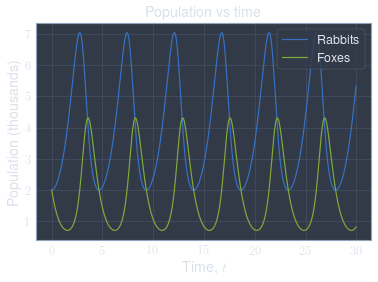

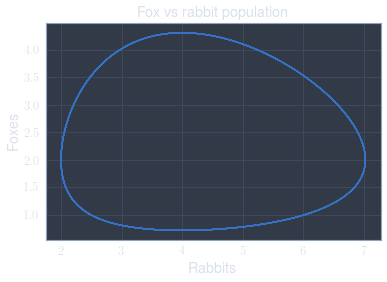

In [9]:
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2

def f(r,t):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return np.array([ fx , fy ], float)

ta = 0.0
tb = 30.0
N = 1000
h = (tb-ta)/N

tpoints = np.arange(ta,tb,h)
xpoints = []
ypoints = []
r = np.array([ 2.0 , 2.0 ], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
mp.plot(tpoints,xpoints, label="Rabbits")
mp.plot(tpoints,ypoints, label="Foxes")
mp.xlabel("Time, $t$")
mp.ylabel("Population (thousands)")
mp.title("Population vs time")
mp.legend()
mp.show()

mp.plot(xpoints,ypoints)
mp.title("Fox vs rabbit population")
mp.xlabel("Rabbits")
mp.ylabel("Foxes")
mp.show()

<b>Exercise 8.3: The Lorenz equations</b>

One of the most celebrated sets of differential equations in physics is the Lorenz equations:

\begin{equation}
    \frac{dx}{dt} = \sigma(y-x)
\end{equation}
\begin{equation}
    \frac{dy}{dt} = \rho x - y - xz
\end{equation}
\begin{equation}
    \frac{dz}{dt} = xy - \beta z
\end{equation}

where $\sigma$, $\rho$, and $\beta$ are constants.

These equations were first studied by Edward Lorenz in 1963, who derived them from a simplified model of weather patterns. The reason for their fame is that they were one of the first incontrovertible examples of deterministic chaos, the occurrence of apparently random motion even though there is no randomness built into the equations. We encountered a different example of chaos in the logistic map of Exercise 3.6.

a) Write a program to solve the Lorenz equations for the case $\sigma = 10$, $\rho = 28$, and $\beta = \frac{8}{3}$ in the range from $t = 0$ to $t = 50$ with initial conditions $(x, y, z) = (0, 1, 0)$. Have your program make a plot of $y$ as a function of time. Note the unpredictable nature of the motion. (Hint: If you base your program on previous ones, be careful. This problem has parameters $r$ and $b$ with the same names as variables in previous programs—make sure to give your variables new names, or use different names for the parameters, to avoid introducing errors into your code.)

b) Modify your program to produce a plot of $z$ against $x$. You should see a picture of the famous “strange attractor” of the Lorenz equations, a lop-sided butterfly-shaped plot that never repeats itself.

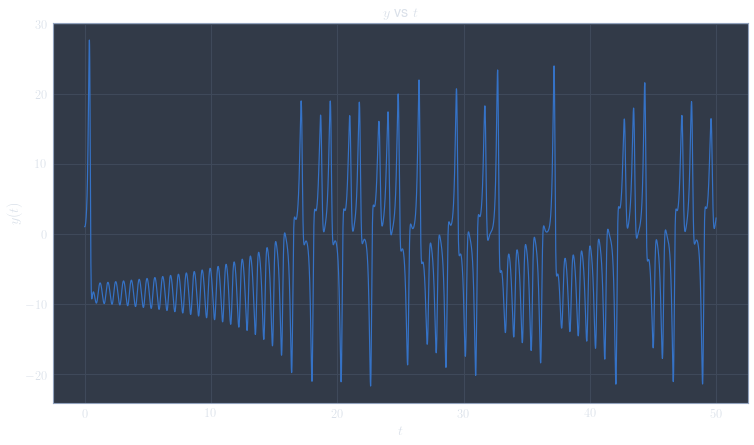

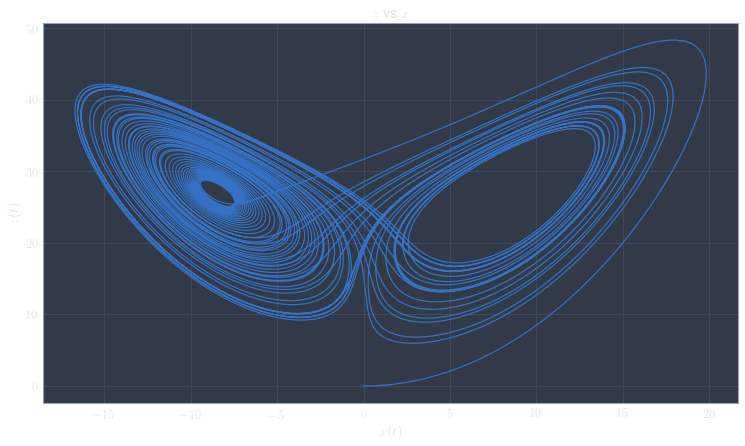

In [11]:
sigma = 10
rho = 28
beta = 8/3

def f(r,t):
    x = r[0]
    y = r[1]
    z = r[2]
    fx = sigma*(y-x)
    fy = rho*x - y - x*z
    fz = x*y - beta*z
    return np.array([fx,fy,fz], float)

ta = 0.0
tb = 50.0
N = 10000
h = (tb-ta)/N

tpoints = np.arange(ta,tb,h)
xpoints = []
ypoints = []
zpoints = []
r = np.array([ 0.0 , 1.0 , 0.0], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

mp.figure(figsize=(7*16/9,7))
mp.plot(tpoints,ypoints)
mp.xlabel("$t$")
mp.ylabel("$y(t)$")
mp.title("$y$ vs $t$")
mp.show()

mp.figure(figsize=(7*16/9,7))
mp.plot(xpoints,zpoints)
mp.xlabel("$x(t)$")
mp.ylabel("$z(t)$")
mp.title("$z$ vs $x$")
mp.show()

<b>Exercise 8.4:</b>

Building on the results from Example 8.6 above, calculate the motion of a nonlinear pendulum as follows.

a) Write a program to solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge–Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^{\circ}$ from the vertical. Make a graph of $\theta$ as a function
of time.

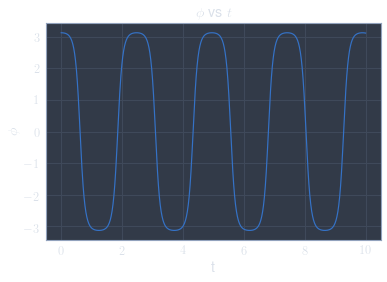

In [14]:
g = 9.81
l = 0.1

def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -g/l * np.sin(theta)
    return np.array([ftheta,fomega], float)

ta = 0.0
tb = 10.0
N = 1000
h = (tb-ta)/N

tpoints = np.arange(ta,tb,h)
thetapoints = []
r = np.array([ 179*np.pi/180 , 0 ], float)
for t in tpoints:
    thetapoints.append(r[0])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
mp.plot(tpoints,thetapoints)
mp.xlabel("t")
mp.ylabel("$\phi$")
mp.title("$\phi$ vs $t$")
mp.show()

<b>Exercise 8.7: Trajectory with air resistance</b>

Many elementarymechanics problems deal with the physics of objects moving or flying through the air, but they almost always ignore friction and air resistance tomake the equations solvable. If we’re using a computer, however, we don’t need solvable equations.

Consider, for instance, a spherical cannonball shot from a cannon standing on level ground. The air resistance on a moving sphere is a force in the opposite direction to the motion with magnitude

\begin{equation}
    F = \frac{1}{2}\pi R^2 \rho C v^2
\end{equation}

where $R$ is the sphere’s radius, $\rho$ is the density of air, $v$ is the velocity, and $C$ is the so-called coefficient of drag (a property of the shape of the moving object, in this case a sphere).

a) Starting from Newton’s second law, $F = ma$, show that the equations of motion for the position $(x, y)$ of the cannonball are

\begin{equation}
    \ddot{x} = -\frac{\pi R^2 \rho C}{2m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2}
\end{equation}
\begin{equation}
    \ddot{y} = -g - \frac{\pi R^2 \rho C}{2m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}
\end{equation}

where $m$ is the mass of the cannonball, $g$ is the acceleration due to gravity, and $\dot{x}$ and $\ddot{x}$ are the first and second derivatives of $x$ with respect to time.

b) Change these two second-order equations into four first-order equations using the methods you have learned, then write a program that solves the equations for a cannonball of mass 1 kg and radius 8 cm, shot at 30$^{\circ}$ to the horizontal with initial velocity 100 m/s. The density of air is $\rho$ = 1.22 kg/$m^3$ and the coefficient of drag for a sphere is C = 0.47. Make a plot of the trajectory of the cannonball (i.e., a graph of $y$ as a function of $x$).

c) When one ignores air resistance, the distance traveled by a projectile does not depend on the mass of the projectile. In real life, however, mass certainly does make a difference. Use your program to estimate the total distance traveled (over horizontal ground) by the cannonball above, and then experiment with the program to determine whether the cannonball travels further if it is heavier or lighter. You could, for instance, plot a series of trajectories for cannonballs of different masses, or you could make a graph of distance traveled as a function of mass. Describe briefly what you discover.

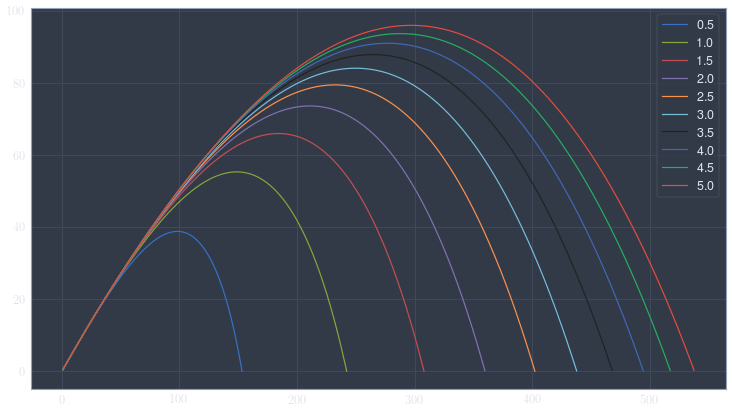

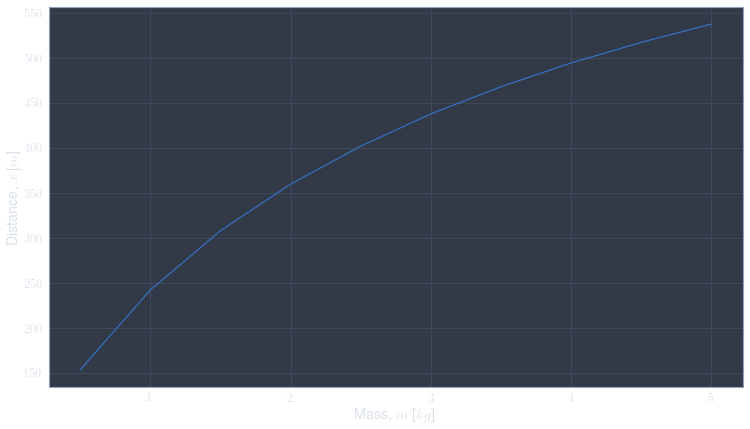

In [16]:
g = 9.81
rho = 1.22
C = 0.47
R = 0.08

class rksolve:
    def __init__(self,f):
        self.f = f
        self.initial_conditions = None
        self.solution = None

    def iterate(self,ta,tb,N=1000):
        f = self.f
        r0 = np.array(self.initial_conditions, float)
        h = (tb-ta)/N
        tpoints = np.arange(ta,tb,h)
        solution = np.empty(tpoints.shape+r0.shape, float)
        r = r0
        for i,t in enumerate(tpoints):
            solution[i] = r
            k1 = h*f(r,t)
            k2 = h*f(r+0.5*k1,t+0.5*h)
            k3 = h*f(r+0.5*k2,t+0.5*h)
            k4 = h*f(r+k3,t+h)
            r += (k1+2*k2+2*k3+k4)/6
        self.h = h
        self.solution = solution
        self.t = tpoints
    
def array_decorator(f,*args,**kwargs):
    #print("function decorated to return array")
    g = lambda *args,**kwargs: np.array(f(*args,**kwargs), float)
    return g

def trajectory(m=1):
    rho = 1.22
    C = 0.47
    g = 9.81
    R = 0.08
    
    @array_decorator
    def f(r,t):
        x,y,vx,vy = r
        v = np.sqrt(vx**2 + vy**2)
        F = 0.5*np.pi*R*R*rho*C*v*v
        dr = [vx,vy]
        dvx = -F/m * vx/v
        dvy = -F/m * vy/v - g
        dv = [dvx,dvy]
        return dr+dv
    
    prob = rksolve(f)
    r0 = [ 0.0, 0.0 ]
    v0e = 100*np.exp(1j*30*np.pi/180)
    v0 = [v0e.real, v0e.imag]
    prob.initial_conditions = r0 + v0
    prob.iterate(0,10)
    x = prob.solution[:,0]
    y = prob.solution[:,1]
    mp.plot(x[y>0],y[y>0], label=m)
    return x[abs(y)<0.2][-1]

mp.figure(figsize=(7*16/9,7))
m_range = np.arange(0.5,5.1,0.5)
x_ground = [trajectory(m) for m in m_range]
mp.legend()
mp.show()

mp.figure(figsize=(7*16/9,7))
mp.plot(m_range,x_ground)
mp.xlabel('Mass, $m$ [$kg$]')
mp.ylabel('Distance, $x$ [$m$]')
mp.show()

<b>Exercise 8.8: Space garbage</b>

A heavy steel rod and a spherical ball-bearing, discarded by a passing spaceship, are floating in zero gravity and the ball bearing is orbiting around the rod under the effect of its gravitational pull.

For simplicity we’ll assume that the rod is of negligible cross-section and heavy enough that it doesn’t move significantly, and that the ball bearing is orbiting around the rod’s mid-point in a plane perpendicular to the rod.

a) Treating the rod as a line of mass $M$ and length $L$ and the ball bearing as a point mass $m$, show that the attractive force $F$ felt by the ball bearing in the direction toward the center of the rod is given by

\begin{equation}
    F = \frac{GMm}{L}\sqrt{x^2 + y^2}\int_{-L/2}^{L/2}\frac{dz}{(x^2 + y^2 + z^2)^{3/2}}
\end{equation}

where $G$ is Newton’s gravitational constant and $x$ and $y$ are the coordinates of the ball bearing in the plane perpendicular to the rod. The integral can be done in closed form and gives

\begin{equation}
    F = \frac{GMm}{\sqrt{(x^2 + y^2)(x^2 + y^2 + L^2/4)}}
\end{equation}

Hence show that the equations of motion for the position $x$, $y$ of the ball bearing in the $xy$-plane are

\begin{equation}
    \frac{d^2x}{dt^2} = -GM\frac{x}{r^2\sqrt{r^2+L^2/4}}
\end{equation}
\begin{equation}
    \frac{d^2y}{dt^2} = -GM\frac{y}{r^2\sqrt{r^2+L^2/4}}
\end{equation}

where $r = \sqrt{x^2+y^2}$.

b) Convert these two second-order equations into four first-order ones using the techniques of Section 8.3. Then, working in units where $G = 1$, write a program to solve them for $M = 10$, $L = 2$, and initial conditions $(x, y) = (1, 0)$ with velocity of $+1$ in the $y$ direction. Calculate the orbit from $t = 0$ to $t = 10$ and make a plot of it, meaning a plot of $y$ against $x$. You should find that the ball bearing does not orbit in a circle or ellipse as a planet does, but has a precessing orbit, which arises because the attractive force is not a simple $\frac{1}{r^2}$ force as it is for a planet orbiting the Sun.

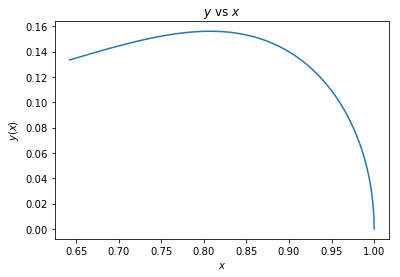

In [16]:
G = 1
M = 10
L = 2
m = 1

def f(r,t):
    x,y,vx,vy = r
    R = x**2 + y**2
    F = G*M*m/(sqrt(R*(R + L**2/4)))
    V = vx**2 + vy**2
    dx = vx/V
    dy = vy/V
    dvx = -G*M * x/(R**2*sqrt(R**2 + L**2/4))
    dvy = -G*M * y/(R**2*sqrt(R**2 + L**2/4))
    return array([ dx , dy , dvx , dvy ], float)

ta = 0.0
tb = 10.0
N = 1000
h = (tb-ta)/N

tpoints = arange(ta,tb,h)
xpoints = []
ypoints = []
vxpoints = []
vypoints = []
r = array([ 1.0 , 0.0 , 0.0 , 1.0 ], float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    vxpoints.append(r[2])
    vypoints.append(r[3])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plot(xpoints,ypoints)
xlabel("$x$")
ylabel("$y(x)$")
title("$y$ vs $x$")
show()

<b>Exercise 8.10: Cometary orbits</b>

Many comets travel in highly elongated orbits around the Sun. For much of their lives they are far out in the solar system, moving very slowly, but on rare occasions their orbit brings them close to the Sun for a fly-by and for a brief period of time they move very fast indeed. This is a classic example of a system for which an adaptive step size method is useful, because for the large periods of time when the comet is moving slowly we can use long time-steps, so that the program runs quickly, but short time-steps are crucial in the brief but fast-moving period close to the Sun.

The differential equation obeyed by a comet is straightforward to derive. The force between the Sun, with mass $M$ at the origin, and a comet of mass $m$ with position vector $\vec{r}$ is $\frac{GMm}{r^2}$ in direction $-\frac{\vec{r}}{r}$ (i.e., the direction towards the Sun), and hence Newton’s second law tells us that

\begin{equation}
    m\frac{d^2\vec{r}}{dt^2} = -\Big(\frac{GMm}{r^2}\Big)\frac{\vec{r}}{r}
\end{equation}

Canceling the $m$ and taking the $x$ component we have

\begin{equation}
    \frac{d^2x}{dt^2} = -GM\frac{x}{r^3}
\end{equation}

and similarly for the other two coordinates. We can, however, throw out one of the coordinates because the comet stays in a single plane as it orbits. If we orient our axes so that this plane is perpendicular to the z-axis, we can forget about the z coordinate and we are left with just two second-order equations to solve:

\begin{equation}
    \frac{d^2x}{dt^2} = -GM\frac{x}{r^3}
\end{equation}
\begin{equation}
    \frac{d^2y}{dt^2} = -GM\frac{y}{r^3}
\end{equation}

where $r = \sqrt{x^2 + y^2}$.

a) Turn these two second-order equations into four first-order equations, using the methods you have learned.

b) Write a program to solve your equations using the fourth-order Runge–Kutta method with a fixed step size. You will need to look up the mass of the Sun and Newton’s gravitational constant $G$. As an initial condition, take a comet at coordinates $x$ = 4 billion kilometers and $y$ = 0 (which is somewhere out around the orbit of Neptune) with initial velocity $v_x$ = 0 and $v_y$ = 500 m/s. Make a graph showing the trajectory of the comet (i.e., a plot of $y$ against $x$).

Choose a fixed step size $h$ that allows you to accurately calculate at least two full orbits of the comet. Since orbits are periodic, a good indicator of an accurate calculation is that successive orbits of the comet lie on top of one another on your plot. If they do not then you need a smaller value of $h$. Give a short description of your findings. What value of $h$ did you use? What did you observe in your simulation? How long did the calculation take?

c) Make a copy of your program and modify the copy to do the calculation using an adaptive step size. Set a target accuracy of $\delta$ = 1 kilometer per year in the position of the comet and again plot the trajectory. What do you see? How do the speed, accuracy, and step size of the calculation compare with those in part (b)?

d) Modify your program to place dots on your graph showing the position of the comet at each Runge–Kutta step around a single orbit. You should see the steps getting closer together when the comet is close to the Sun and further apart when it is far out in the solar system.

Calculations like this can be extended to cases where we have more than one orbiting body—see Exercise 8.16 for an example. We can include planets, moons, asteroids, and others. Analytic calculations are impossible for such complex systems, but with careful numerical solution of differential equations we can calculate the motions of objects throughout the entire solar system.

In [11]:
class rk4:

    def __init__(self,f):
        self.f = f
        self.initial_conditions = None
        self.solution = None

    def iterate(self,ta,tb,N=100000):
        f = self.f
        r0 = np.array(self.initial_conditions,float)
        h = (tb-ta)/N
        tpoints = np.arange(ta,tb,h)
        solution = np.empty(tpoints.shape + r0.shape,float)
        r = r0
        for i,t in enumerate(tpoints):
            solution[i]=r
            r += self.estimate_delta(r,t,h)
        self.h = h
        self.solution = solution
        self.t = tpoints

    def estimate_delta(self,r,t,h):
        f = self.f
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        return (k1+2*k2+2*k3+k4)/6

class rk4_adaptive(rk4):

    def iterate(self,ta,tb,delta=1):
        N = 10000
        r0 = np.array(self.initial_conditions,float)
        h = (tb-ta)/N
        solution = []
        ttime = []
        r = r0
        t = ta
        solution.append(copy(r))
        ttime.append(t)
        ro = 1
        while t<tb:
            if ro<2:
                h = h*ro**(1/4)
            else:
                h*=2
            r1 = r + self.estimate_delta(r,t,h)
            r1 += self.estimate_delta(r1,t+h,h)
            r2 = r + self.estimate_delta(r,t,2*h)
            difference = r1 - r2
            ro = 30*h*delta/np.sqrt(difference[0]**2 + difference[1]**2)
            if ro>1:
                t +=2*h
                r = r1
                solution.append(copy(r))
                ttime.append(t)
        self.h = h
        self.solution = np.array(solution)
        self.t = ttime

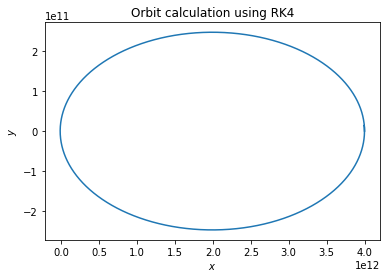

Runtime: 26.38 seconds


In [106]:
M = float(M_sun.value)
G = gravitational_constant

def f(r,t):
    x,y,vx,vy = r
    dx = vx
    dy = vy
    R = sqrt(x**2 + y**2)
    dvx = -G*M*x/R**3
    dvy = -G*M*y/R**3
    return array([ dx , dy , dvx , dvy ],float)

t0 = time()

prob = rk4(f)

R = 1.496e11
T = 3.156e7 
v = 2*pi*R/T
prob.initial_conditions = [ 4e12 , 0 , 0 , 500 ]
prob.iterate(0,T*50)

t1 = time()

x = prob.solution[:,0]
y = prob.solution[:,1]
title("Orbit calculation using RK4")
xlabel("$x$")
ylabel("$y$")
plot(x,y)
show()
print("Runtime: %.2f seconds" %(t1-t0))

In [12]:
M = float(ap.M_sun.value)

def f(r,t):
    x,y,vx,vy = r
    dx = vx
    dy = vy
    R = np.sqrt(x**2 + y**2)
    dvx = -G*M*x/R**3
    dvy = -G*M*y/R**3
    return np.array([ dx , dy , dvx , dvy ],float)

t0 = time.time()

prob = rk4_adaptive(f)

R = 1.496e11
T = 3.156e7 
v = 2*np.pi*R/T
prob.initial_conditions = [ 4e12 , 0 , 0 , 500 ]
delta = 1e3/365/24/60/60
prob.iterate(0,T*50,delta)

t1 = time()

x = prob.solution[:,0]
y = prob.solution[:,1]
mp.title("Orbit calculation using adaptive RK4")
mp.xlabel("$x$")
mp.ylabel("$y$")
mp.plot(x,y,"b-")
mp.plot(x,y,"b.")
mp.show()
print("Runtime: %.2f seconds" %(t1-t0))

ValueError: setting an array element with a sequence.